In [75]:
# Clear workspace
# rm(list = ls())
# Load libraries
library(IRdisplay)
library(igraph)
igraph_options(vertex.frame.color = "white", vertex.frame.size = 1)
# library(sigmajs)
library(ggplot2)
theme_set(new = theme_light())
options(repr.plot.width = 4, repr.plot.height = 3)

# Networks: A very brief Introduction

A seminar series on Networks for the Masters in Math and Data Science.


Practical Issues:

* R needed
* I am using Jupyter Notebooks (read [this, on _Nature_](https://www.nature.com/articles/d41586-018-07196-1) to see how **cool** Jupyter is!!) 

    * http://jupyter.org/install
    * https://irkernel.github.io/installation/
    * just as Rmarkdown (code not in chunks but in code-cells and markdown in markdown-cells)

## 0. Why do we study Networks?

### Complex Systems

[Top 20 Papers That Will Introduce You to Complexity Theory Research
](http://complexitylabs.io/Blog/top-resources-for-learning-complexity/?portfolioCats=401)

##### Some Keywords:

* interacting parts
* emergence
* collective behaviour
* self-organisation
* evolution
* patterns
* non-linearity
* ...

##### Some examples

* Ecosystems
* Human body or brain...
* An [ant colony](https://www.quantamagazine.org/ants-build-complex-structures-with-a-few-simple-rules-20140409/)
* ...
* Millennium Bridge, London, 2000

In [29]:
IRdisplay::display_html('<iframe width="560" height="315" 
                          src="https://www.youtube.com/embed/eAXVa__XWZ8" 
                          frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; 
                          picture-in-picture" allowfullscreen></iframe>')

### Network Modeling

Networks as mathematical models of complex systems, [Borgatti, Halgin 2011](http://steveborgatti.com/papers/orsc.1110.0641.pdf).

> A graph $G = (V, E)$ is a pair of sets, where the elements of $V$ are called _vertices_ (nodes), $E \subseteq V \times V$.

> For $u, v \in V$, $(u, v) \in E$, or $\{u, v\} \in E$ if $G$ is undirected, are called _edges_. 

Elements ~ **vertices**, interactions and relationships ~ **edges**. 

The pattern of connections in a network yields a particular network structure so we can study its characteristics (e.g. edge denity, rich-clubs, **community structure** etc.) and what position vertices occupy (node **centrality**).


#### Importance of Network Modeling

## 1. Fundamentals of Graph Theory

Throughout this course we are going to mix theory and practice, so to have a rough idea of network analysis in R.

R packages required:

* `igraph`, see [`igraph`'s documentation](http://igraph.org/r/doc/);
* `sigmajs`;
* ...

### 1.1 Definitions

###### Def. (Graph)
A graph $G = (V, E)$ is a pair of sets, where the elements of $V$ are called vertices (nodes), $E \subseteq V \times V$, whit $(u, v) \in E$ (if $G$ is undirected $\{u, v\}$) is an _edge_ for $u, v \in V$. 

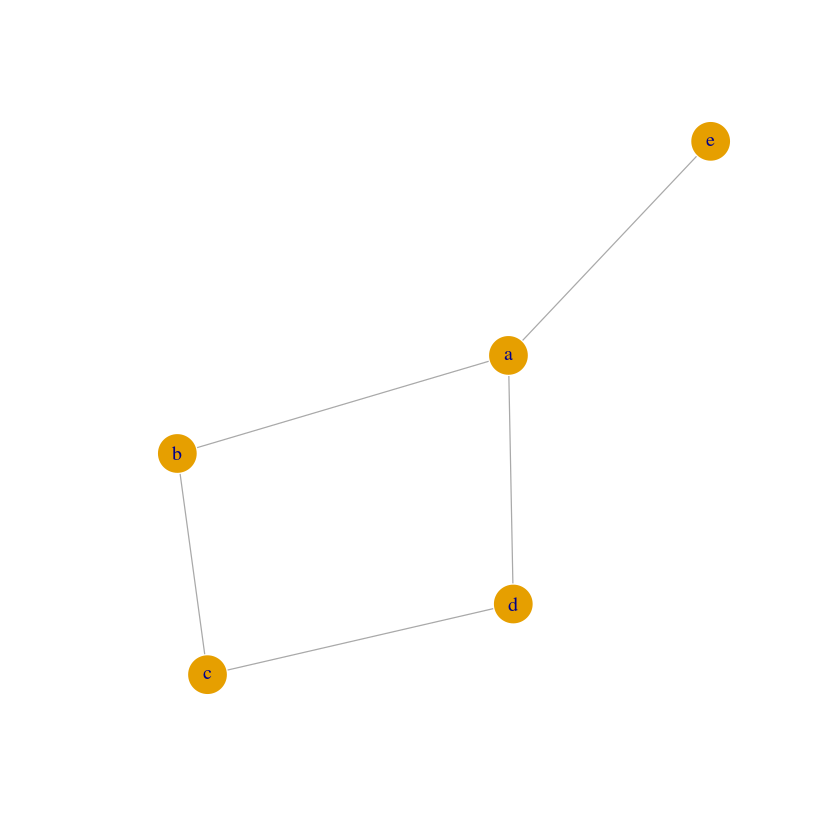

In [5]:
g <- make_graph(edges = c("a", "b", "b", "c", "a", "d", "c", "d", "a", "e"), directed = FALSE)
plot(g)

Networks do not have to be _connected_. A disconnected network is one in which some nodes cannot reach certain others by any path; the network is divided into _components_. Nodes without any adjacent are said to be _isolated_.

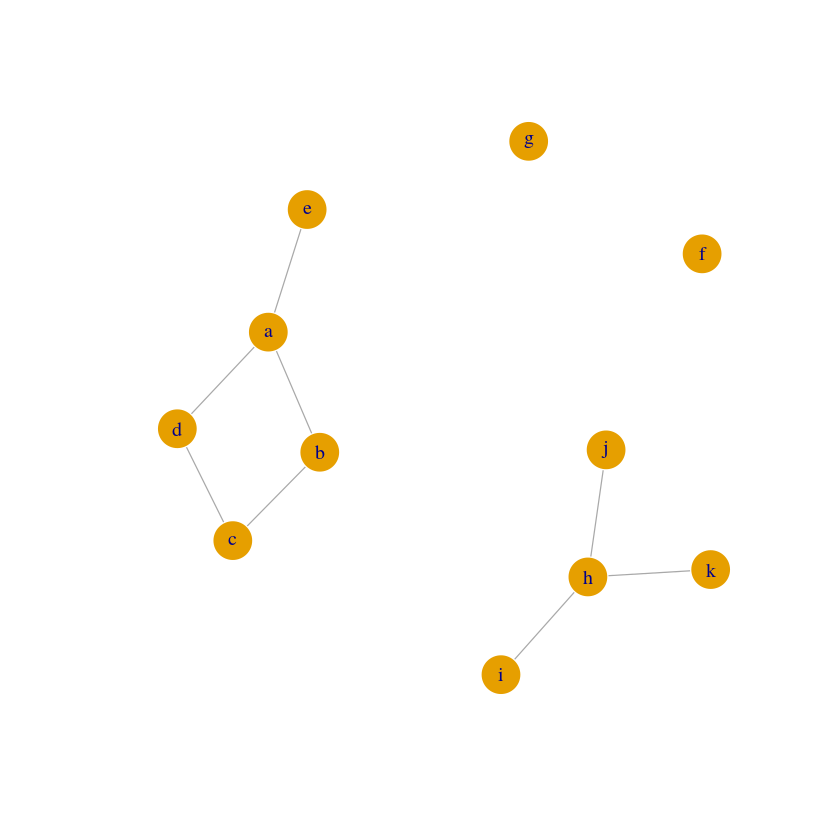

In [68]:
g <- make_graph(edges = c("a", "b", "b", "c", "a", "d", "c", "d", "a", "e", "h", "i", "h", "j", "h", "k"), 
                isolates = c("f", "g"),
                directed = FALSE)
plot(g)

You can explore the graph, asking for the sets $V$, $E$.

In [69]:
V(g)
E(g)

+ 11/11 vertices, named, from dee7d01:
 [1] a b c d e h i j k f g

+ 8/8 edges from dee7d01 (vertex names):
[1] a--b b--c a--d c--d a--e h--i h--j h--k

Given a vertex, e.g. "a" we can loo at its _adjacents_ or _adjacency list_
$$
\{v \in V(G) : (a, v) \in E\}
$$

In [70]:
g["a", ]

a b c d e h i j k f g 
0 1 0 1 1 0 0 0 0 0 0

###### Def. (Adjacency Matrix)
Given a graph $G = (V, E)$ with $N = |V|$ vertices, which can be labeled from $1, \dots, N$.
The adjacency matrix $A$ of $G$ is defined as
$A = \{a_{ij}\}_{i,j=1}^{N}$, where its elements are
$$a_{ij} = 
\begin{cases}
1 & (i, j) \in V \\
0 & \text{otherwise}
\end{cases}$$

In [71]:
g[] # equivalently: as_adjacency_matrix(g)

   [[ suppressing 11 column names ‘a’, ‘b’, ‘c’ ... ]]


11 x 11 sparse Matrix of class "dgCMatrix"
                       
a . 1 . 1 1 . . . . . .
b 1 . 1 . . . . . . . .
c . 1 . 1 . . . . . . .
d 1 . 1 . . . . . . . .
e 1 . . . . . . . . . .
h . . . . . . 1 1 1 . .
i . . . . . 1 . . . . .
j . . . . . 1 . . . . .
k . . . . . 1 . . . . .
f . . . . . . . . . . .
g . . . . . . . . . . .

**Observation:** The adjacency matrix of $G$ is a block matrix, $G$ is not connected.

###### Def. (degree)

The _degree_ $k_i$ of a vertex $i \in G$ is the number of edges incident to $i$. Given $A$ the adjacency matrix of $G$ 
$$k_i = \sum_j a_{ij}.$$

In [72]:
k_g <- degree(g)
k_g

a b c d e h i j k f g 
3 2 2 2 1 3 1 1 1 0 0

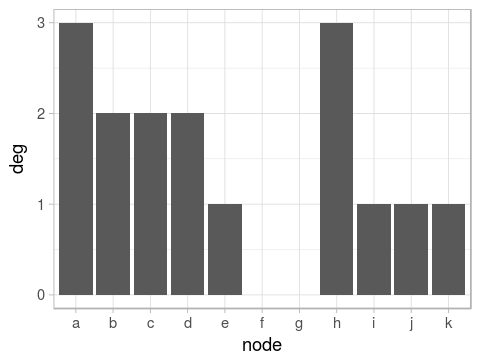

In [76]:
data <- data.frame(node = names(k_g), deg = k_g)
ggplot(data = data, aes(x = node, y = deg)) + 
  geom_bar(stat="identity")

### 1.2 The Laplacian of a Graph

A very important matrix in network science is the graph's Laplacian matrix $L$, also called admittance or Kirchhoff matrix, together with its \textit{normalised} counterpart $\textbf{L}$. 
The main reference for the following paragraphs is [Chung, 1997](https://goo.gl/5wh715), a classic book in Spectral graph theory; the first chapther can be found [here](http://www.cs.ucsb.edu/~veronika/MAE/lecturesspectralgraphtheory_chung.pdf).

###### Def. (Graph's Laplacian)

### * _ 1.3 Random Walks and Graphs_